# Notebook d’exploration

# Idée d'application:

Une application mobile qui, après avoir identifié le produit, retourne une note entre 0 et 100 représentant le caractère nutritionnel et sain. 
la note sera construite en agrégeant les indicateurs suivants :
- le nombre d’additifs;
- le nutriscore;
- le caractère sucré du produit;
- le caractère salé du produit;
- la présence d'acides gras saturés.

# Analyse exploratoire:

### Importation des données  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
#importation de la table
df=pd.read_csv('df_clean.csv')
df.head(10)

,product_name,salt_100g,sodium_100g,additives_tags,nutrition_grade_fr,ingredients_from_palm_oil_n,additives_n,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
0,Mini Confettis,0.0100,0.003937,unknown,d,0.0,0.0,Sugary snacks,unknown,1753.0,29.517397,0.8,42.989658,87.7,0.900000,0.6,14.0
1,Praliné Amande Et Noisette,0.0030,0.001181,unknown,d,0.0,0.0,Sugary snacks,unknown,2406.0,43.060869,2.9,39.416274,50.3,3.900000,9.5,14.0
2,"Pepsi, Nouveau goût !",0.0254,0.010000,"en:e150d,en:e338",e,0.0,2.0,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000000,0.0,13.0
3,Tarte Poireaux Et Lardons,0.8000,0.314961,unknown,d,0.0,0.0,Sugary snacks,unknown,1079.0,14.224571,11.0,23.938321,1.0,1.400000,7.5,15.0
4,7Up,0.1000,0.039370,"en:e330,en:e296,en:e331",e,0.0,3.0,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.331246,0.0,13.0
5,Madeleines nature,0.6600,0.259843,"en:e422,en:e503,en:e500,en:e450,en:e471",d,0.0,5.0,Sugary snacks,Biscuits and cakes,1900.0,23.000000,2.5,55.000000,26.0,1.500000,6.0,12.0
6,Cakes Raisins,0.6500,0.255906,"en:e422,en:e503,en:e500,en:e450,en:e471",d,0.0,5.0,Sugary snacks,Biscuits and cakes,1768.0,19.000000,2.5,56.000000,28.0,1.800000,5.8,13.0
7,Cakes aux Fruits,0.6000,0.236220,"en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...",d,0.0,11.0,Sugary snacks,Biscuits and cakes,1670.0,15.000000,2.0,60.000000,34.0,1.500000,4.9,12.0
8,Financiers aux Amandes,0.5500,0.216535,"en:e422,en:e500,en:e450",e,0.0,3.0,Sugary snacks,Biscuits and cakes,1868.0,23.000000,10.0,51.000000,39.0,1.700000,8.0,22.0
9,Fondants Citron,0.7800,0.307087,"en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...",e,0.0,8.0,Sugary snacks,Biscuits and cakes,1896.0,24.000000,10.0,50.000000,37.0,2.500000,8.1,22.0


In [3]:
#verifions les valeurs manquantes 
df.isna().sum()

product_name                   0
salt_100g                      0
sodium_100g                    0
additives_tags                 0
nutrition_grade_fr             0
ingredients_from_palm_oil_n    0
additives_n                    0
pnns_groups_1                  0
pnns_groups_2                  0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
nutrition-score-fr_100g        0
dtype: int64

In [4]:
df.shape

(50649, 17)

In [5]:
df.columns

Index(['product_name', 'salt_100g', 'sodium_100g', 'additives_tags',
       'nutrition_grade_fr', 'ingredients_from_palm_oil_n', 'additives_n',
       'pnns_groups_1', 'pnns_groups_2', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'nutrition-score-fr_100g'],
      dtype='object')

### Analyse uni-variée

<AxesSubplot:ylabel='None'>

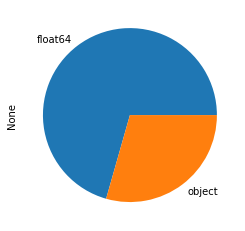

In [6]:
#regardons les types de données dans cette table
df.dtypes.value_counts().plot.pie()

In [7]:
df.dtypes

product_name                    object
salt_100g                      float64
sodium_100g                    float64
additives_tags                  object
nutrition_grade_fr              object
ingredients_from_palm_oil_n    float64
additives_n                    float64
pnns_groups_1                   object
pnns_groups_2                   object
energy_100g                    float64
fat_100g                       float64
saturated-fat_100g             float64
carbohydrates_100g             float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
nutrition-score-fr_100g        float64
dtype: object

### Histogrammes des variables continues

<Figure size 720x144 with 0 Axes>

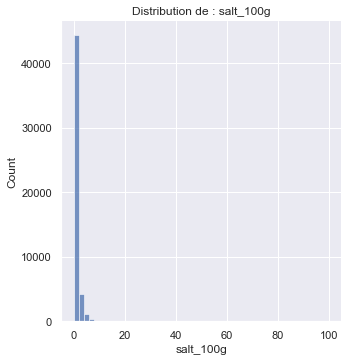

<Figure size 720x144 with 0 Axes>

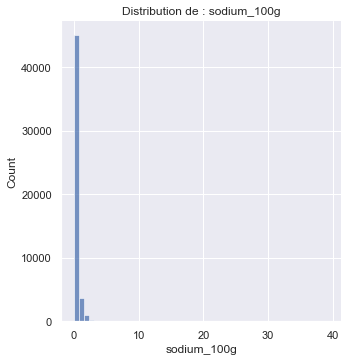

<Figure size 720x144 with 0 Axes>

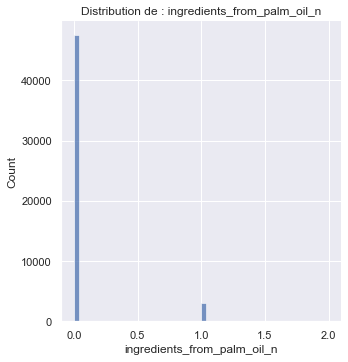

<Figure size 720x144 with 0 Axes>

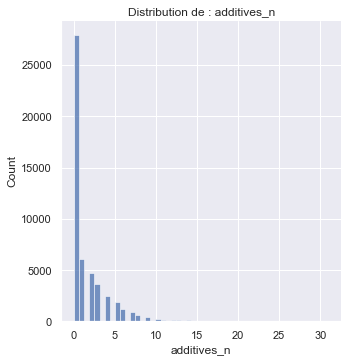

<Figure size 720x144 with 0 Axes>

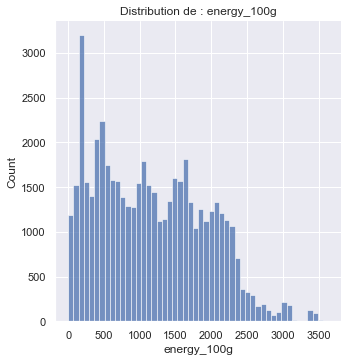

<Figure size 720x144 with 0 Axes>

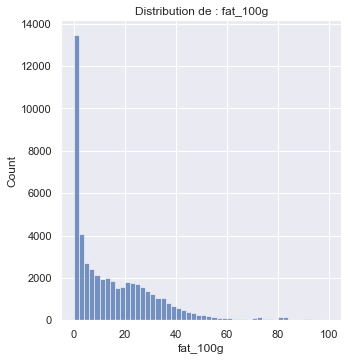

<Figure size 720x144 with 0 Axes>

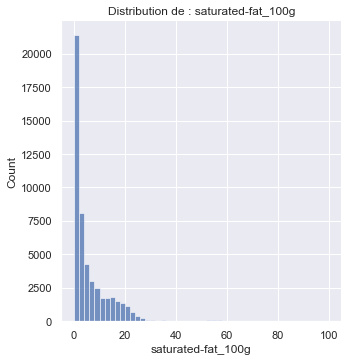

<Figure size 720x144 with 0 Axes>

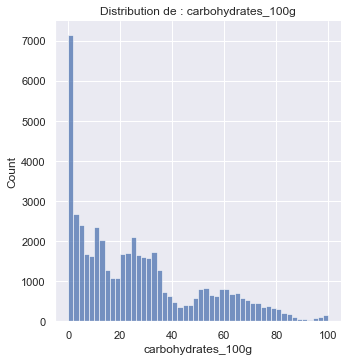

<Figure size 720x144 with 0 Axes>

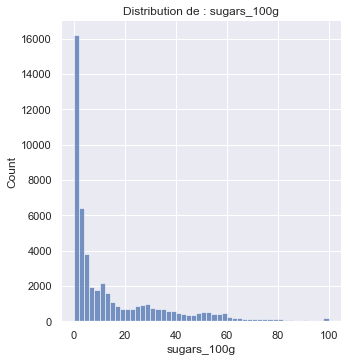

<Figure size 720x144 with 0 Axes>

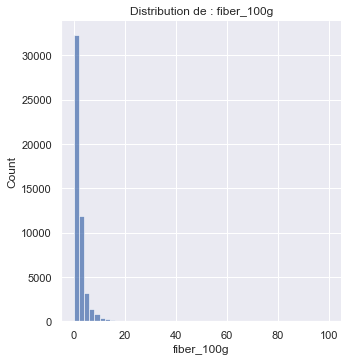

<Figure size 720x144 with 0 Axes>

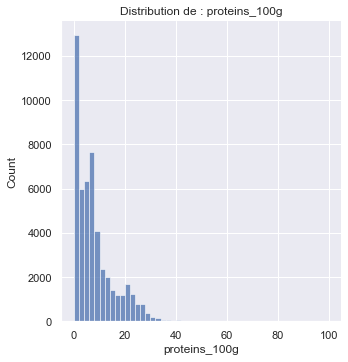

<Figure size 720x144 with 0 Axes>

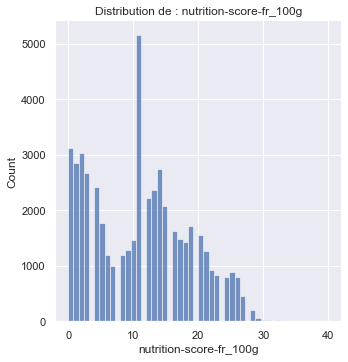

In [8]:
for col in df.select_dtypes('float'):
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.displot(df[col], bins=50)
    chaine = 'Distribution de : '+ col
    plt.title(chaine)
    plt.xlabel(col)
    plt.show()

On peut remarquer sur les histogrammes ci-dessus que:
- les données sont asymétriques. Elles ne sont donc pas normalement distribuées. 
- certaines distributions ont une allure très semblable comme:salt_100g, sodium_100g, fat_100g, saturated-fat_100g, sugars_100g, fiber_100g, proteins_100g.
- les variables 'énergy_100g' et 'nutrition-score-fr_100g' semblent avoir des données mulitimodales.


### Boxplot des variables continues:

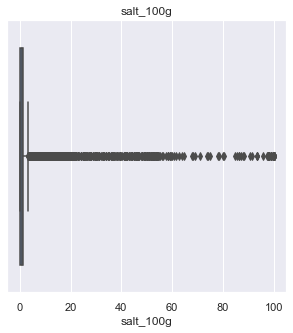

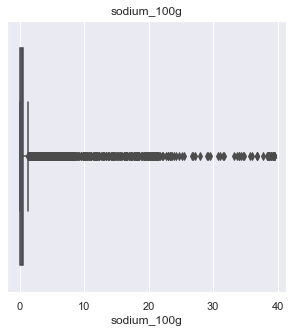

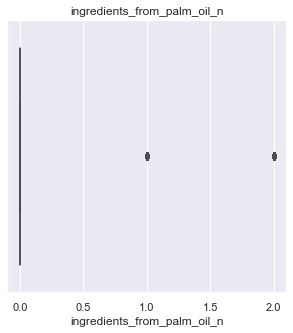

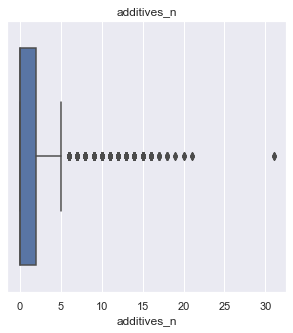

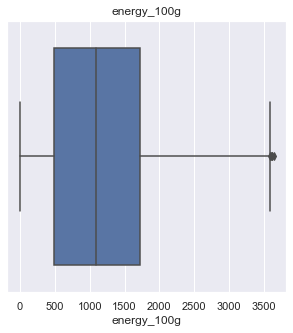

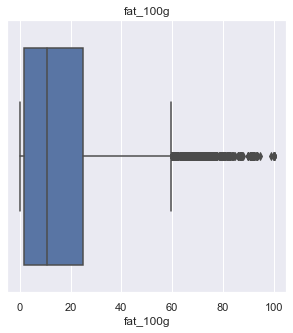

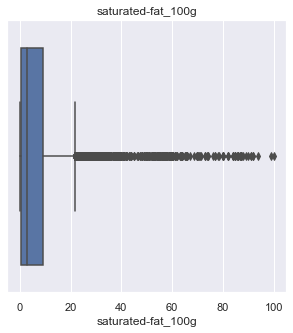

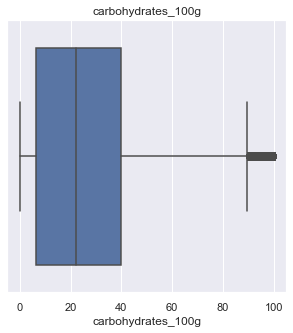

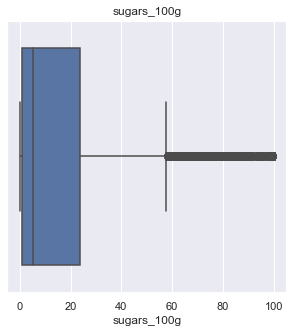

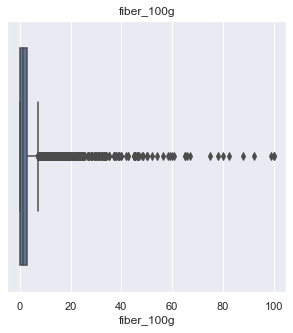

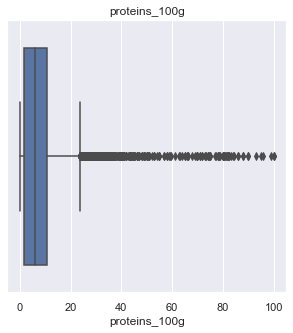

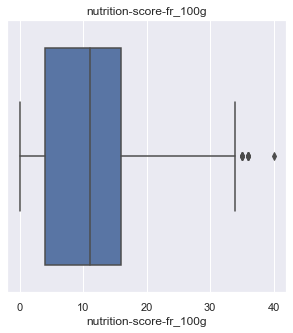

In [9]:
for var in df.select_dtypes('float'):
    plt.figure(figsize=(5,5));
    sns.boxplot(x=df[var]).set_title(var)

In [10]:
for var in df.select_dtypes('float'):
    print(df[var].describe());

count    50649.000000
mean         1.278130
std          4.457738
min          0.000000
25%          0.090000
50%          0.652780
75%          1.400000
max        100.000000
Name: salt_100g, dtype: float64
count    50649.000000
mean         0.503201
std          1.755013
min          0.000000
25%          0.035433
50%          0.257000
75%          0.551181
max         39.370079
Name: sodium_100g, dtype: float64
count    50649.000000
mean         0.062035
std          0.244796
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ingredients_from_palm_oil_n, dtype: float64
count    50649.000000
mean         1.532291
std          2.470132
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         31.000000
Name: additives_n, dtype: float64
count    50649.000000
mean      1161.886864
std        754.620850
min          0.000000
25%        492.000000
50%       1090.000000
75%       1728

En observant les boxplots, on constate egalement, comme dans le cas des histogrammes, que les différentes variables ne semblent pas suivre une loi normale.

### barplots

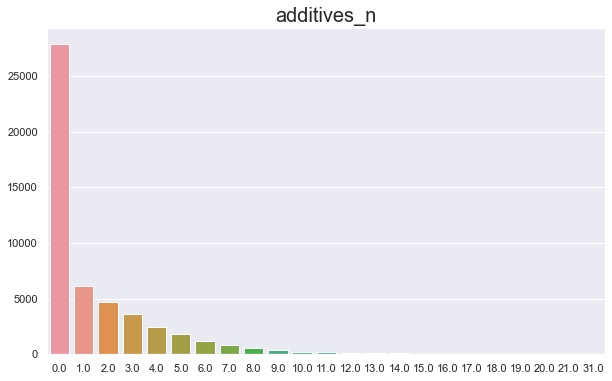

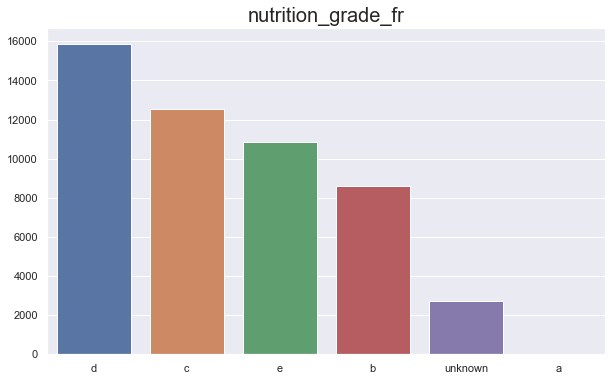

In [11]:
# La répartition des variables 'nutrition_grade_fr' et 'additives_n'
var_barplot=['additives_n','nutrition_grade_fr']
for i in var_barplot:
    comptage=df[i].value_counts()
    plt.figure(figsize=(10,6))
    plt.title(i, size=20)
    sns.barplot(x=comptage.index, y=comptage.values)

## Analyse bivariée

### Matrice de corrélation entre les variables continues

In [12]:
var_continues=df.select_dtypes('float').columns
var_continues

Index(['salt_100g', 'sodium_100g', 'ingredients_from_palm_oil_n',
       'additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

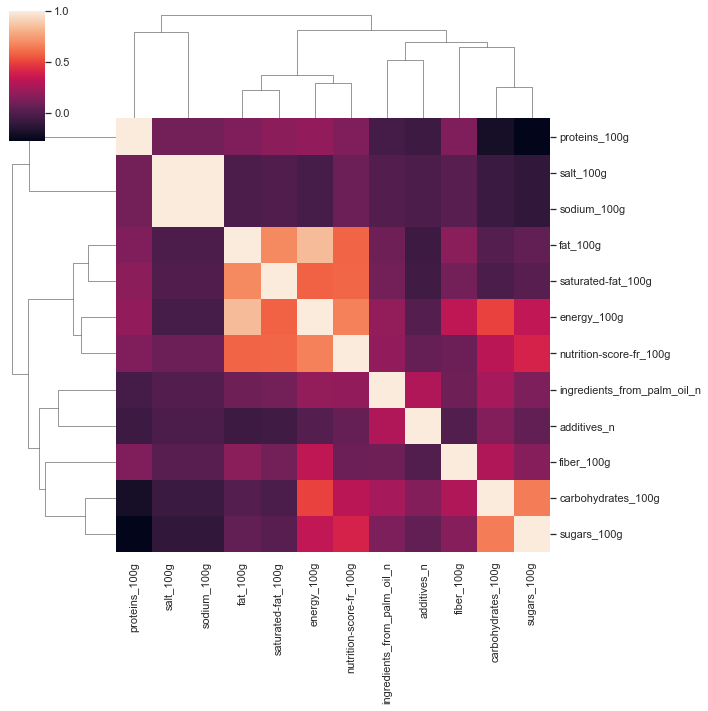

In [13]:
sns.clustermap(df[var_continues].corr())

Analyse de la matrice de correlation:
   - la variable proteins_100g n'est corrélée directement avec aucune variable.
   - la variable salt_100g a une forte corrélation avec sodium_100g
   - les variables fat_100g, satured-fat_100g, energy_100g et nutrition-score-fr_100g sont fortement corrélées
   - les variables carbohydrates_100g et sugars_100g sont fortement corrélées

On peut représenter certaines relations sur un nuage de points

<AxesSubplot:xlabel='salt_100g', ylabel='sodium_100g'>

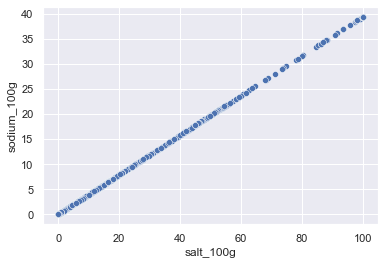

In [39]:
#Analyse de la corélation entre les variables 'salt_100g' et 'sodium_100g' 
sns.scatterplot(data=df, x='salt_100g', y='sodium_100g')

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='salt_100g'>

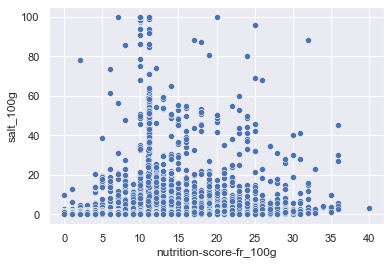

In [15]:
#Analyse de la corélation entre les variables 'nutrition-score-fr_100g' et 'salt_100g' 
sns.scatterplot(data=df, x='nutrition-score-fr_100g', y='salt_100g')

### Boxplot variables numérique / categorielle

Prenons comme exemple la répartition de la variable 'sugars_100g' selon le nutriscore:

<AxesSubplot:xlabel='sugars_100g', ylabel='nutrition_grade_fr'>

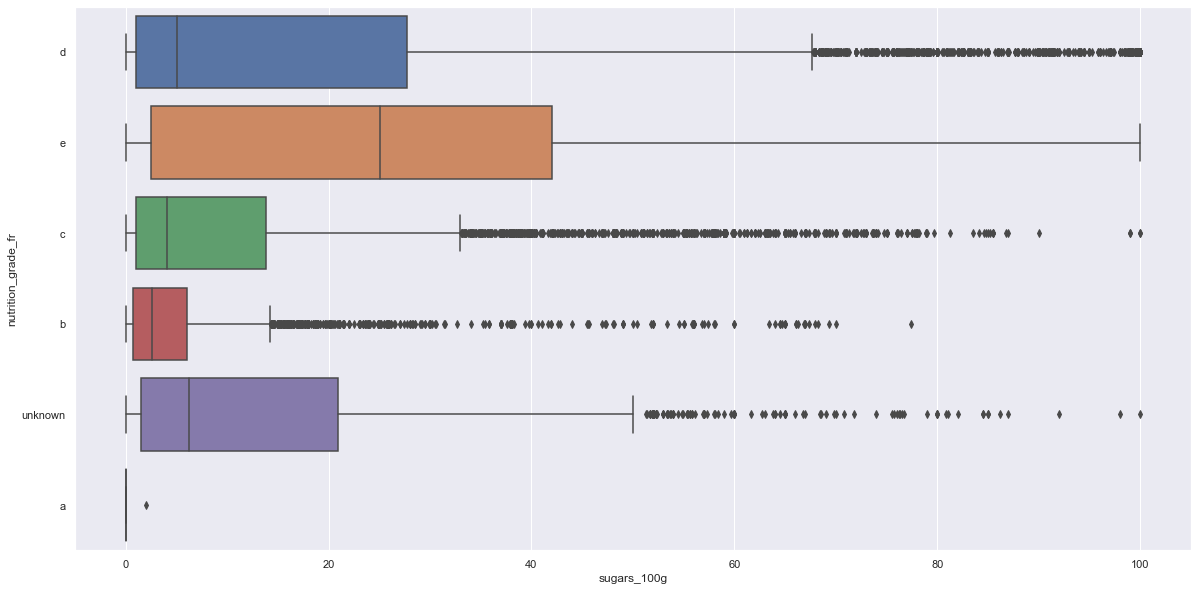

In [43]:
plt.subplots(figsize=(20,10))
sns.boxplot(x=df['sugars_100g'], y=df['nutrition_grade_fr'])

Nous pouvons remarquer que les produits les plus sucrés sont moins bien notés que les produits les moins sucrés. Nous pouvons verifier ces résultats à l'aide d'une analyse de la variance.

### Analyse de la variance: Anova

Verifions d'abord avant d'effectuer ce test, si la distribution des variables quantitatives est normarle?

#### Test de normalité d'Agostino & Pearson

In [17]:
from scipy import stats

In [18]:
for col in var_continues:
    print('________\n{}'.format(col))
    k2, p = stats.normaltest(df[col], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha :
        print("H0 est rejetée : {} n'est pas de distribution normale".format(col))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(col))

________
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale
________
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pas de distribution normale
________
ingredients_from_palm_oil_n
p = 0
H0 est rejetée : ingredients_from_palm_oil_n n'est pas de distribution normale
________
additives_n
p = 0
H0 est rejetée : additives_n n'est pas de distribution normale
________
energy_100g
p = 0
H0 est rejetée : energy_100g n'est pas de distribution normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
carbohydrates_100g
p = 0
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
fiber_100g
p = 0
H0 est rejetée : fiber_100g n'est pas de distribution normale
________
proteins_100g
p = 0
H0 est rejetée : protei

Aucune variable numérique n'a une distribution normale, l'Anova ne sera pas pertinent dans ce cas. Mais réalisons quand mème une analyse de la variance, pour mettre en evidence, l'existence d'une interaction entre les produits sucrés et le nutiscore  

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

- H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
- H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('sugars_100g ~ nutrition_grade_fr', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,2.482020e+06,5.0,1411.925128,0.0
Residual,1.780504e+07,50643.0,NaN,NaN


conclusion: H1, Les moyennes de chaque groupe ne sont pas toutes égales

la pertinence de ce test repose sur la validation de plusieurs hypothèses :

- l’indépendance entre les échantillons de chaque groupe
- l’égalité des variances que l’on peut verifier avec un test de Bartlett.
- la normalité de la variable quantitative

l’indépendance entre les échantillons de chaque groupe est vérifiée, ici A, B, C....


In [20]:
#L’égalité des variances:
df.groupby('nutrition_grade_fr')['additives_n'].agg('var')

nutrition_grade_fr
a          0.236842
b          5.821317
c          5.405492
d          7.241155
e          5.257785
unknown    6.521571
Name: additives_n, dtype: float64

#test de bartlett pour tester si les variances sont significativement différentes ou non avec :
- H0 : Les variances de chaque groupe sont égales si p-value > 5%
- H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

In [21]:
from scipy.stats import bartlett

In [22]:
bartlett(df.additives_n[df.nutrition_grade_fr == 'a'],
        df.additives_n[df.nutrition_grade_fr == 'b'],
        df.additives_n[df.nutrition_grade_fr == 'c'],
         df.additives_n[df.nutrition_grade_fr == 'd'],
        df.additives_n[df.nutrition_grade_fr == 'e'])

BartlettResult(statistic=540.5058017027794, pvalue=1.1588596278116736e-115)

H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

### Analyse en composantes principales 

In [92]:
#extraction et standardisation des variables targets
features= ['salt_100g', 'additives_n','sugars_100g','nutrition-score-fr_100g','saturated-fat_100g']
X = df[features]
keep_ind = X.index


In [93]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

In [96]:
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=5)

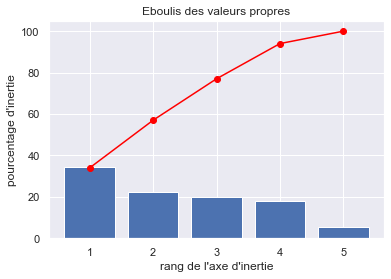

In [97]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On voit ici que les deux premières composantes principales expliquent environ 60% de la variance, et prèt de 80% la variance est comprise dans les 3 premières composantes.

### Cercle de corrélation:

In [98]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features

In [99]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    
    x,y=x_y
    fig, ax = plt.subplots(figsize=(10, 9))
 
    for i in range(0, pca.components_.shape[1]):

        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])

    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    plt.axis('equal')
    plt.show(block=False)

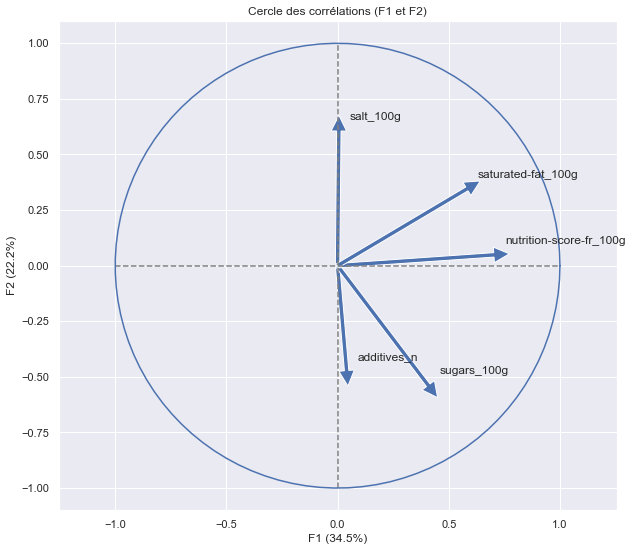

In [100]:
correlation_graph(pca,(0,1),features)

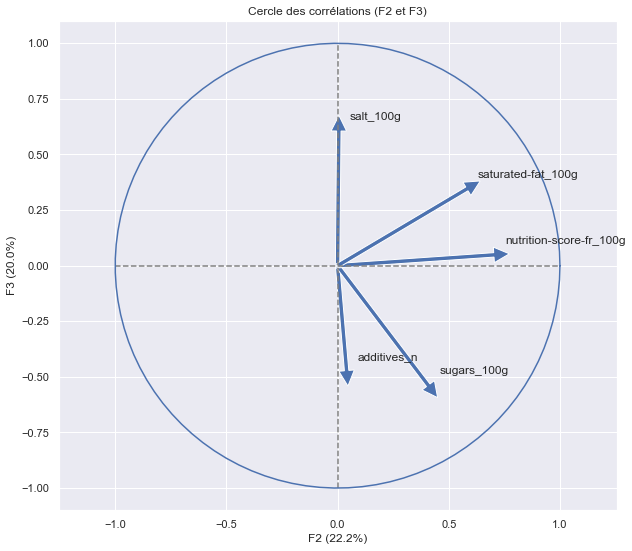

In [101]:
correlation_graph(pca,(1,2),features)

On peut remarquer sur le cercle ci-dessus que la viarable nutriscore-fr_100g est fortement corrélée à la variable F1 et la variables salt_100g et additives_n sont fortement corrélées à F2.

### projection

In [102]:
X_proj = pca.transform(X_scaled)

In [103]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    

    X_ = np.array(X_projected)

    if not figsize: 
        figsize = (7,6)

    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e
 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   
 
    x, y = x_y
      
    fig, ax = plt.subplots(1, 1, figsize=figsize)

 
    c = None if clusters is None else clusters
    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    if len(labels) : 
       
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


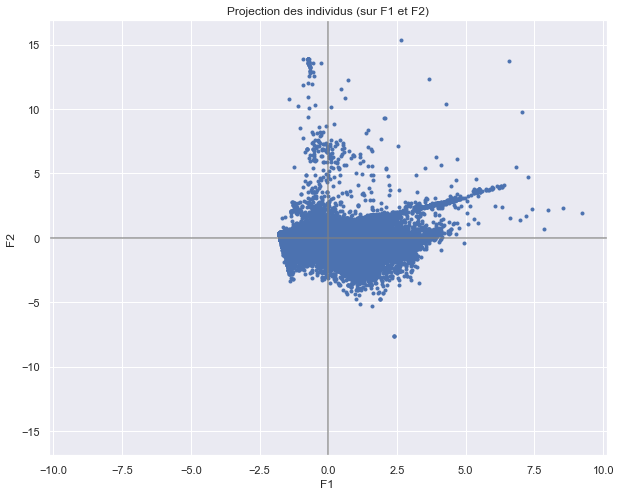

In [104]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

In [109]:
acp_df = pd.DataFrame(X_proj)
acp_df['nutrition-score-fr_100g'] = df.loc[keep_ind, 'nutrition-score-fr_100g']
acp_df['salt_100g'] = df.loc[keep_ind, 'salt_100g']
acp_df['pnns_groups_1'] = df.loc[keep_ind, 'pnns_groups_1']
acp_df['additives_n'] = df.loc[keep_ind,'additives_n']

<Figure size 1080x1080 with 0 Axes>

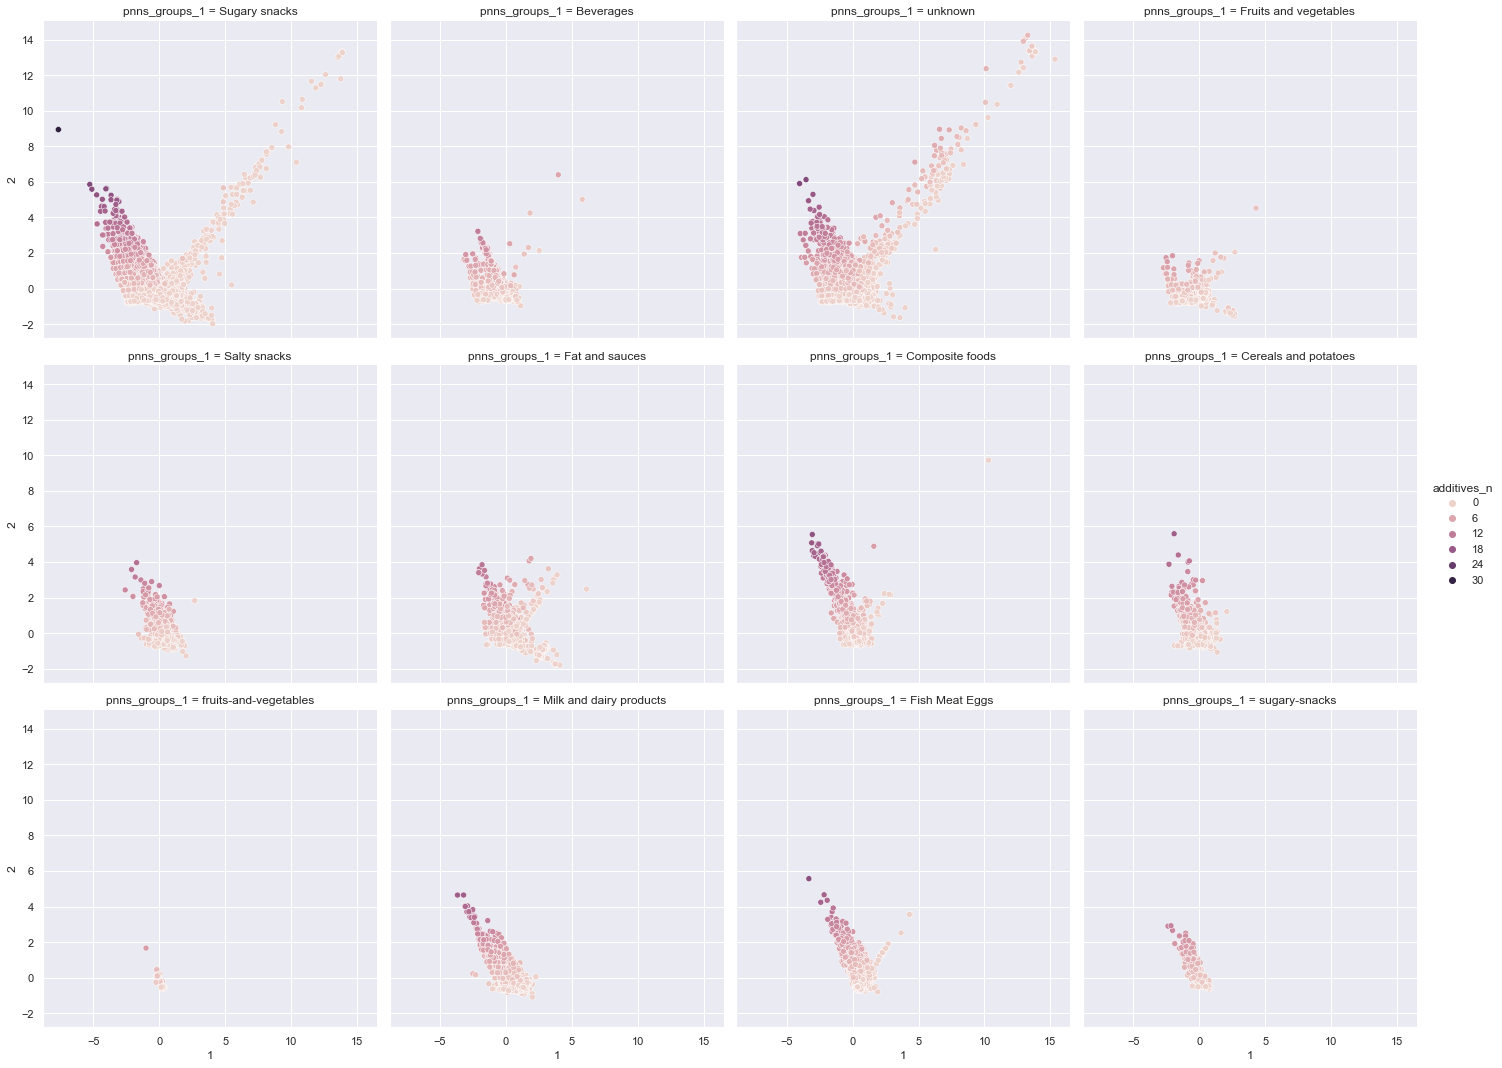

In [110]:
plt.figure(figsize=(15, 15))
sns.relplot(data=acp_df, x=1, y=2, col='pnns_groups_1', col_wrap=4, hue='additives_n');